### imports

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline

### make datasets into BERT format & split train-test if needed

#### IMDB dataset

In [125]:
train = 'train'
out_path = 'aclImdb/'
path = 'aclImdb/' + train + "/"

positive

In [126]:
cur_path = path+'pos'
directory = os.fsencode(cur_path)

txt_lst = []

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if not filename.endswith(".txt"): 
        print(filename + ' - not .txt')
        continue
    else:
        with open(os.path.join(cur_path, filename), 'r', encoding='utf-8') as f:
            txt_lst.append(f.read().replace('\n', ''))

In [127]:
pos = pd.DataFrame(txt_lst, columns=['content'])
pos['label'] = np.ones((len(pos), 1)) 

In [128]:
pos.shape

(12500, 2)

In [129]:
lens = pos.content.apply(lambda x: len(x.split()))

In [130]:
sum(lens < 200)

7218

In [131]:
pos = pos[lens < 200]

negative

In [132]:
cur_path = path+'neg'
directory = os.fsencode(cur_path)

txt_lst = []

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if not filename.endswith(".txt"): 
        print(filename + ' - not .txt')
        continue
    else:
        with open(os.path.join(cur_path, filename), 'r', encoding='utf-8') as f:
            txt_lst.append(f.read().replace('\n', ''))

In [133]:
neg = pd.DataFrame(txt_lst, columns=['content'])
neg['label'] = np.zeros((len(neg), 1)) 

In [134]:
lens = neg.content.apply(lambda x: len(x.split()))

In [135]:
sum(lens < 200)

7362

In [136]:
neg = neg[lens < 200]

In [137]:
df = pd.concat([pos,neg])

In [138]:
df['label'] = df.label.astype(int)
df.head()

,content,label
0,"Yes it was a little low budget, but this movie...",1
1,I really liked this movie I saw the original c...,1
2,"I appreciated the photography, the textures, t...",1
8,"...intimate and specific. Yes, a bit of a cind...",1
13,"A classic cartoon, always enjoyable and funny....",1


In [139]:
df.to_csv(out_path + 'imdb_' + train + '.csv', index=False)

#### click-bait

In [31]:
df_data = pd.read_json('clickbait/instances.jsonl', lines=True)
df_target = pd.read_json('clickbait/truth.jsonl', lines=True)

In [32]:
len(df_data)

19538

In [35]:
# mrege both dataframes
df = df_data.merge(df_target, on='id')

In [36]:
df.head()

,id,postMedia,postText,postTimestamp,targetCaptions,targetDescription,targetKeywords,targetParagraphs,targetTitle,truthClass,truthJudgments,truthMean,truthMedian,truthMode
0,858462320779026432,[],[UK’s response to modern slavery leaving victi...,Sat Apr 29 23:25:41 +0000 2017,[modern-slavery-rex.jpg],“Inexcusable” failures in the UK’s system for ...,"modern slavery, Department For Work And Pensio...",[Thousands of modern slavery victims have not ...,‘Inexcusable’ failures in UK’s response to mod...,no-clickbait,"[0.33333333330000003, 0.0, 0.33333333330000003...",0.133333,0.000000,0.000000
1,858421020331560960,[],[this is good],Sat Apr 29 20:41:34 +0000 2017,"[In this July 1, 2010 file photo, Dr. Charmain...",President Donald Trump has appointed pro-life ...,"Americans United for Life, Dr. Charmaine Yoest...",[President Donald Trump has appointed the pro-...,Donald Trump Appoints Pro-Life Advocate as Ass...,clickbait,"[1.0, 1.0, 1.0, 1.0, 1.0]",1.000000,1.000000,1.000000
2,858368123753435136,[],"[The ""forgotten"" Trump roast: Relive his bruta...",Sat Apr 29 17:11:23 +0000 2017,[President Trump will not attend this year's W...,President Trump won't be at this year's White ...,"trump whcd, whcd, white house correspondents d...",[When the White House correspondents’ dinner i...,The ‘forgotten’ Trump roast: Relive his brutal...,no-clickbait,"[0.33333333330000003, 1.0, 0.33333333330000003...",0.466667,0.333333,0.333333
3,858323428260139008,[],[Meet the happiest #dog in the world!],Sat Apr 29 14:13:46 +0000 2017,"[Maru , Maru, Maru, Maru, Maru]","The article is about Maru, a husky dog who has...","Maru, husky, dogs, pandas, furball, instagram",[Adorable is probably an understatement. This ...,"Meet The Happiest Dog In The World, Maru The H...",clickbait,"[1.0, 0.6666666666000001, 1.0, 1.0, 1.0]",0.933333,1.000000,1.000000
4,858283602626347008,[],[Tokyo's subway is shut down amid fears over a...,Sat Apr 29 11:35:31 +0000 2017,[All nine lines of Tokyo's subway system were ...,"The temporary suspension, which lasted ten min...","Tokyo,subway,shut,fears,North,Korean,attack",[One of Tokyo's major subways systems says it ...,Tokyo's subway is shut down amid fears over an...,no-clickbait,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.000000,0.000000


In [37]:
filtered_df = df[['postText','truthClass']]  # take only wanted columns
filtered_df.truthClass = (filtered_df.truthClass == 'clickbait')  # binarise classes
filtered_df.columns = ['content', 'label']  # change column names
filtered_df.label = filtered_df.label.astype(int)  # make zero 1 for similarity to the others
filtered_df.content = filtered_df.content.apply(lambda x: x[0])  # take string and not list

/storage/conda_envs/thesis/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [38]:
filtered_df.head()

,content,label
0,UK’s response to modern slavery leaving victim...,0
1,this is good,1
2,"The ""forgotten"" Trump roast: Relive his brutal...",0
3,Meet the happiest #dog in the world!,1
4,Tokyo's subway is shut down amid fears over an...,0


In [39]:
# train test split
df_click_train, df_click_test = train_test_split(filtered_df, test_size=0.2, random_state=7)

In [40]:
# save files
df_click_train.to_csv('clickbait/clickbait_train.csv', index=False)
df_click_test.to_csv('clickbait/clickbait_test.csv', index=False)

#### spam

In [2]:
df = pd.read_csv('spam/SPAM text message 20170820 - Data.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.Category = (df.Category == 'spam').astype(int)
df.columns = ['label', 'content']
df = df[['content', 'label']]

train test split

In [11]:
df_spam_train, df_spam_test = train_test_split(df, test_size=0.2, random_state=7)

save files

In [12]:
df_spam_train.to_csv('spam/spam_train.csv', index=False)
df_spam_test.to_csv('spam/spam_test.csv', index=False)

#### toxic

In [2]:
df_train = pd.read_csv('toxic/train.csv')
df_test = pd.read_csv('toxic/test.csv')
test_labels = pd.read_csv('toxic/test_labels.csv')

In [13]:
# add wanted labels from class
df_test["toxic"] = test_labels.toxic

In [14]:
# filter only labelled test data
df_test = df_test[df_test.toxic != -1]

In [16]:
df_test.head()

,id,comment_text,toxic
5,0001ea8717f6de06,Thank you for understanding. I think very high...,0
7,000247e83dcc1211,:Dear god this site is horrible.,0
11,0002f87b16116a7f,"""::: Somebody will invariably try to add Relig...",0
13,0003e1cccfd5a40a,""" \n\n It says it right there that it IS a typ...",0
14,00059ace3e3e9a53,""" \n\n == Before adding a new product to the l...",0


In [18]:
# take only wanted columns and change their names
df_train_toxic = df_train[["comment_text", "toxic"]]
df_train_toxic.columns = ['content', 'label']

df_test_toxic = df_test[["comment_text", "toxic"]]
df_test_toxic.columns = ['content', 'label']

In [20]:
# save
df_train_toxic.to_csv('toxic/toxic_train.csv', index=False)
df_test_toxic.to_csv('toxic/toxic_test.csv', index=False)

### pre process the strings

In [376]:
base_path = 'toxic/toxic'
dataset = 'test'
in_path = base_path + '_' + dataset + '.csv'
out_path = base_path + '_' + dataset + '_clean.csv'

In [377]:
df = pd.read_csv(in_path)

In [378]:
df.head()

,content,label
0,Thank you for understanding. I think very high...,0
1,:Dear god this site is horrible.,0
2,"""::: Somebody will invariably try to add Relig...",0
3,""" \n\n It says it right there that it IS a typ...",0
4,""" \n\n == Before adding a new product to the l...",0


#### drop nans

In [379]:
df = df.dropna()

#### filter html markings & replace special utf-8 characters

In [381]:
def replace_special_chars(s):
    map_dict = {'’':"'", '…':'...', "–":'-', '“':'"', '—':'-', "‘":"'", '”':'"', "&amp;":"&", "&gt;":'', '&lt;':'', '\n':' ', '<br /><br />':' '}
    for key in map_dict:
        s = s.replace(key, map_dict[key])
    return s

In [382]:
df['content'] = df.content.apply(replace_special_chars)

#### add white space around punctuation

In [383]:
def space_punctuation(s):
    s = re.sub(r'([0-9a-zA-Z])(\')([a-zA-Z])', r'\1____\3', s)  # save midword apostrephes
    s = re.sub(r'([a-zA-Z])(\.)([a-zA-Z])', r'\1~~~~\3', s)  # save midword .
    # space around punctuation
    s = re.sub(r'([a-zA-Z])([.,!?#*()/\[\];:"“”\-\'])', r'\1 \2', s)
    s = re.sub(r'([.,!?#*()/\[\];:"“”\-\'])([a-zA-Z])', r'\1 \2', s)

    s = re.sub(r'____', "'", s)  # return apostrhephes
    s = re.sub(r'~~~~', ".", s)  # return .

    return s

In [384]:
df.content = df.content.apply(space_punctuation)

In [385]:
# special case to surround "="+ with spaces even if it is joined to text
df.content = df.content.apply(lambda x: re.sub(r'(=)+', ' \\1 ', x))

#### make text lower case

In [386]:
df.content = df.content.apply(lambda x: x.lower())

#### remove extra white spaces

In [387]:
df.content = df.content.apply(lambda x: ' '.join(x.split()))

#### filter extremely long sentences

In [388]:
# if not one can get indexing errors when training BERT model
lens = df.content.apply(lambda x: len(x.split()))
df = df[(lens<250)]

#### save csv

In [392]:
df.sample().iloc[0].content

'" = requested move = : donna simpson ( obese ) → donna simpson ( american ) - or a better alternative , if this article is notable . i don\'t think "" obese "" in parenthesis is a good disambiguator , even if she is notable for her weight , and it arguably violates wp : blp . note there is only one other donna simpson on wikipedia . "'

In [393]:
df.to_csv(out_path, index=False)

### train BERT model & inference on test

this is in a seperate notebook (depends if training transfer BERT or end2end BERT)

### create a sample based on sentence length and model predictions

In [15]:
base_path = 'aclImdb/imdb'
test_path = base_path + '_test_pred.csv'
out_path = base_path + '_sample.csv'
max_sent_len = 15
min_sent_len = 0

In [16]:
df = pd.read_csv(test_path)

filter by length

In [17]:
lens = df.content.apply(lambda x: len(x.split()))

(array([  42.,  517., 1071., 1006., 1618., 3438., 2952., 2247., 1616.,
         319.]),
 array([  8.,  32.,  56.,  80., 104., 128., 152., 176., 200., 224., 248.]),
 <a list of 10 Patch objects>)

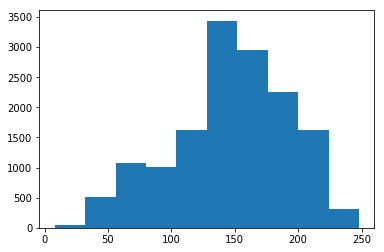

In [18]:
plt.hist(lens)

In [19]:
'num examples: ', sum((min_sent_len<=lens)&(lens<=max_sent_len))

('num examples: ', 6)

In [20]:
df_filtered = df[(min_sent_len<=lens)&(lens<=max_sent_len)]

filter by tp,fp, etc. wanted distribution

In [11]:
tp = df_filtered[(df_filtered.label == 1) & (df_filtered.preds == 1)]
fp = df_filtered[(df_filtered.label == 0) & (df_filtered.preds == 1)]
tn = df_filtered[(df_filtered.label == 0) & (df_filtered.preds == 0)]
fn = df_filtered[(df_filtered.label == 1) & (df_filtered.preds == 0)]
len(tp), len(fp), len(tn), len(fn)

(2383, 1580, 9525, 114)

In [12]:
tp = df_filtered[(df_filtered.label == 1) & (df_filtered.preds == 1)].sample(125, random_state=42)
fp = df_filtered[(df_filtered.label == 0) & (df_filtered.preds == 1)].sample(125, random_state=42)
tn = df_filtered[(df_filtered.label == 0) & (df_filtered.preds == 0)].sample(125, random_state=42)
fn = df_filtered[(df_filtered.label == 1) & (df_filtered.preds == 0)].sample(125, random_state=42)
df_final = pd.concat([tp, fp, tn, fn])

In [13]:
len(df_final)

500

In [20]:
df_final.sample().iloc[0].content

"what a bozo . hey 68, i know you think you're clever but just for your information i live nowhere near san jose . just because an ip might trace to a certain area that has no bearing whatever on where a person lives or is writing from . ips can range all over the country . you should be embarrassed , and ashamed ."

sample statistics

In [21]:
filtered_lens = df_final.content.apply(lambda x: len(x.split()))
print('len mean: ', filtered_lens.mean())
print('len std: ', filtered_lens.std())
print('len median: ', filtered_lens.median())
print('len min: ', filtered_lens.min())
print('len max: ', filtered_lens.max())

len mean:  69.604
len std:  13.616681388063984
len median:  68.0
len min:  50
len max:  100


save sample

In [22]:
df_final.to_csv(out_path, index=False)

#### make train test sample

In [23]:
df_test = pd.read_csv(out_path)

In [24]:
df_test.head()

,content,label,preds
0,""" = why am i not allowed to removed my ( defam...",1,1
1,= milena & doah ? we dating or what ? = truth ...,1,1
2,: i agree obviously an idiot looks at the pric...,1,1
3,= hey white fuking christian ashole = this mot...,1,1
4,""" : don't look at the sun . it's not daring it...",1,1


In [25]:
tp = df_filtered[(df_filtered.label == 1) & (df_filtered.preds == 1)]
tn = df_filtered[(df_filtered.label == 0) & (df_filtered.preds == 0)]
len(tp), len(tn)

(668, 12754)

In [26]:
# tp_train = tp[~tp.content.isin(df_test.content)]
# or 
tn_train = tn[~tn.content.isin(df_test.content)]

In [28]:
tn_train.shape

(12629, 3)

In [29]:
# tp_train_final = tp_train.sample(1000, random_state=3)
tn_train_final = tn_train.sample(12500, random_state=3)

In [31]:
len(tn_train_final)

12500

In [32]:
train_out_path = base_path + '_train_sample.csv'
tn_train_final.to_csv(train_out_path, index=False)